In [5]:
import os

In [2]:
import cv2

In [3]:
import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [52]:
from sklearn.metrics import mean_squared_error as mse

<hr>

### 1. WAP to compute and display the histogram of a grayscale image using NumPy(mannual, method), without using cv2.calcHist().

<hr>

In [5]:
img = cv2.imread('sunflower.jpg')

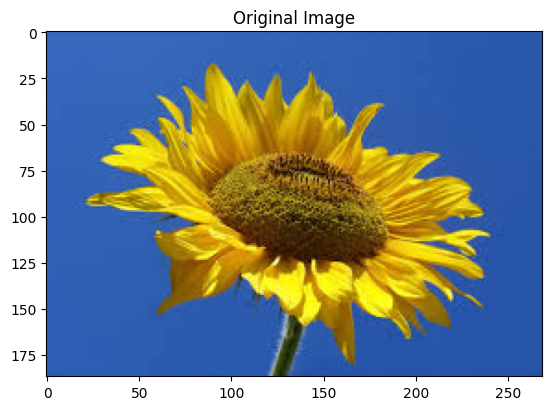

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

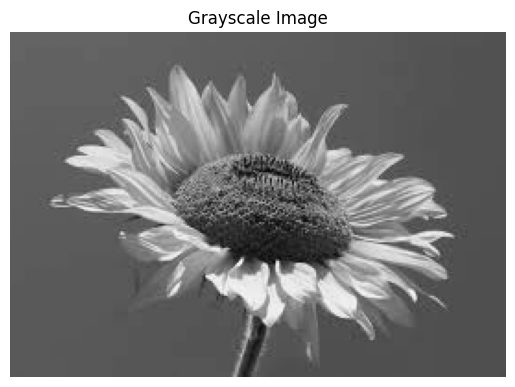

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

plt.title("Grayscale Image")

plt.axis('off')

plt.show()

In [8]:
#Mannual Histogram

hist_manual, bins = np.histogram(gray.flatten(), 256, [0, 256])

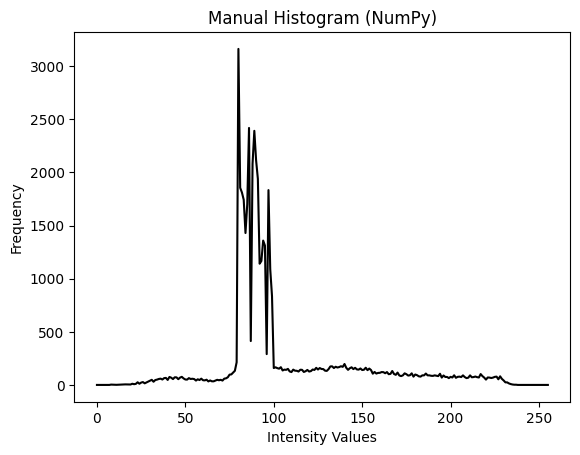

In [9]:
plt.plot(hist_manual, color='black')

plt.title("Manual Histogram (NumPy)")

plt.xlabel("Intensity Values")

plt.ylabel("Frequency")

plt.show()

<hr>

### 2. WAP that performs constranst streching on a grayscale image using the formula: and display the before -after images.

<hr>

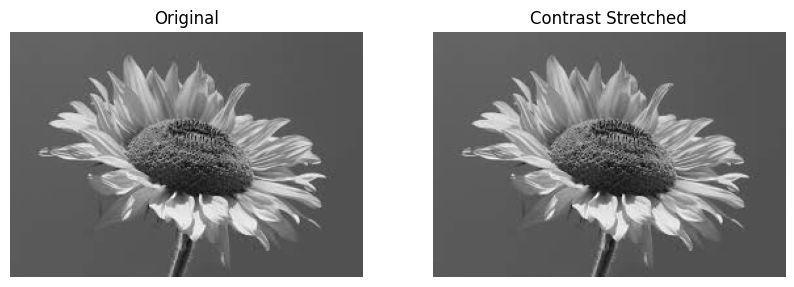

In [20]:
img = cv2.imread("sunflower.jpg", 0)

r_min = np.min(img)
r_max = np.max(img)

stretched = ((img - r_min) / (r_max - r_min)) * 255
stretched = stretched.astype(np.uint8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(stretched, cmap='gray')
plt.title("Contrast Stretched")
plt.axis('off')
plt.show()

<hr>

### 3. WAP using OpenCV to apply histogram equalisation to the image 'building.jpg' and display both the qualised image and its.

<hr>

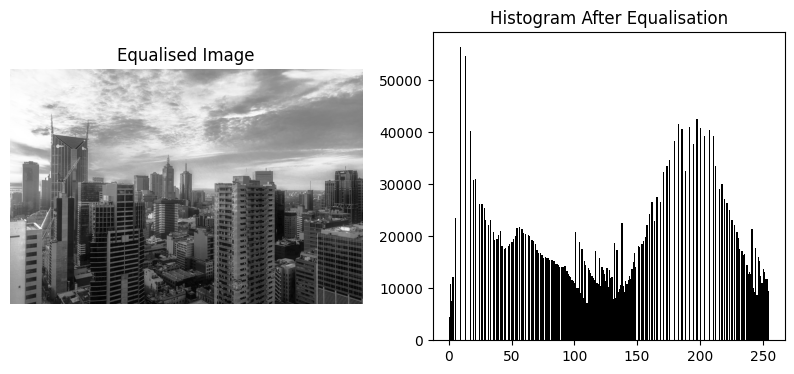

In [6]:
img = cv2.imread("building.jpg", 0)
eq = cv2.equalizeHist(img)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(eq, cmap='gray')
plt.title("Equalised Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(eq.flatten(), 256, color='black')
plt.title("Histogram After Equalisation")

plt.show()

<hr>

## 4. WAP snippet to apply CLAHE (clipLimit = 3.0, tileGridSize = (8,8)) to “xray.png” and save the enhanced image as “xray_clahe.png”.

<hr>

In [65]:
img = cv2.imread("xray.png")
img_orig = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

cv2.imwrite("xray_clahe.png", clahe_img)

True

(np.float64(-0.5), np.float64(149.5), np.float64(147.5), np.float64(-0.5))

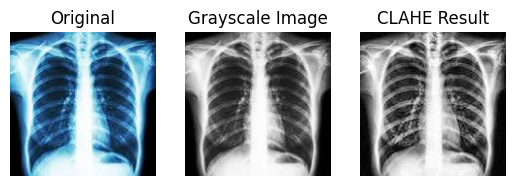

In [73]:
plt.subplot(1, 3, 1)
plt.imshow(img_orig)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE Result")
plt.axis('off')




<hr>

## 5. WAP program to add Gaussian noise (mean = 0, std = 20) to an image and then denoise it using a 5×5 Gaussian filter. Display all three: original, noisy, and filtered image.

<hr>

In [32]:
img = cv2.imread('sunflower.jpg')

In [33]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

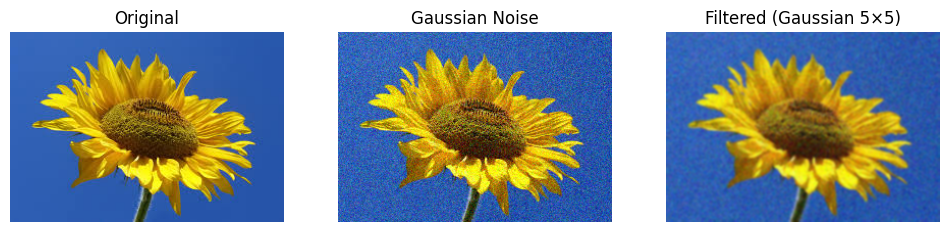

In [35]:
noise = np.random.normal(0, 20, img.shape).astype(np.int16)
noisy = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)

filtered = cv2.GaussianBlur(noisy, (5,5), 0)

plt.figure(figsize=(12,4))
titles = ["Original", "Gaussian Noise", "Filtered (Gaussian 5×5)"]
images = [img, noisy, filtered]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.show()

<hr>

## 6. WAP that adds salt-and-pepper noise to an image and then removes it using a 5×5 median filter. Display the result.​

<hr>

In [36]:
img = cv2.imread("sunflower.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

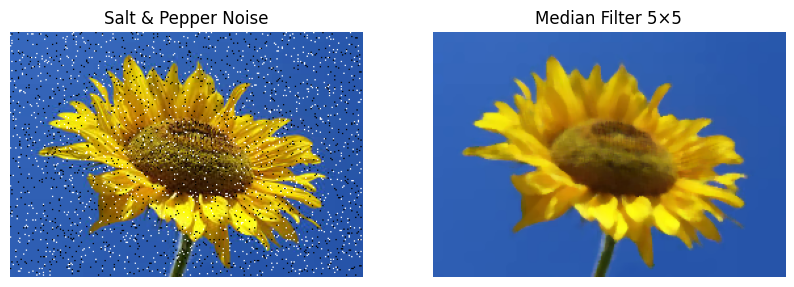

In [37]:
sp = img.copy()
prob = 0.02

num_salt = int(prob * img.size * 0.5)
coords = [np.random.randint(0, i-1, num_salt) for i in img.shape[:2]]
sp[coords[0], coords[1]] = 255

num_pepper = int(prob * img.size * 0.5)
coords = [np.random.randint(0, i-1, num_pepper) for i in img.shape[:2]]
sp[coords[0], coords[1]] = 0

median = cv2.medianBlur(sp, 5)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sp)
plt.title("Salt & Pepper Noise")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(median)
plt.title("Median Filter 5×5")
plt.axis('off')

plt.show()

<hr>

## 7. WAP to apply an averaging filter (kernel size 7×7) to smooth “portrait.jpg” and display the output using Matplotlib.​

<hr>

In [42]:
img = cv2.imread('portrait.jpg')

In [43]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

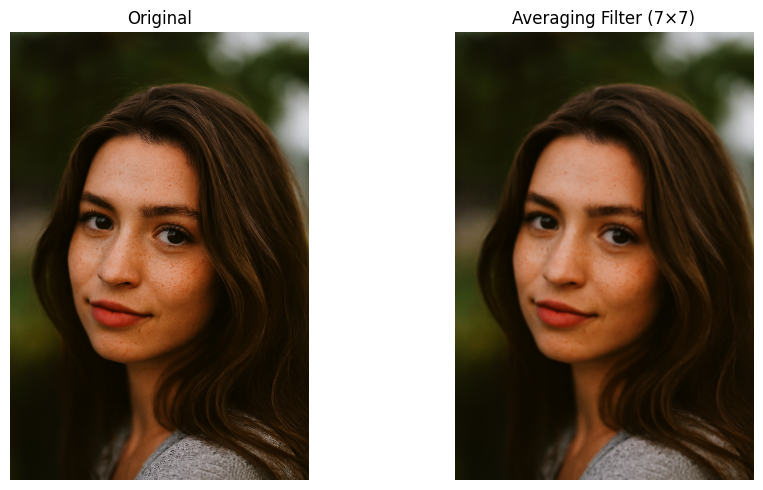

In [46]:
blur = cv2.blur(img, (7,7))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title("Averaging Filter (7×7)")
plt.axis('off')

plt.tight_layout()
plt.show()


<hr>

## 8. WAP using OpenCV to apply a bilateral filter (d = 9, sigmaColor = 75, sigmaSpace = 75) to “face.jpg” and compare the original and filtered images side by side.

<hr>

In [47]:
img = cv2.imread("face.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [48]:
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

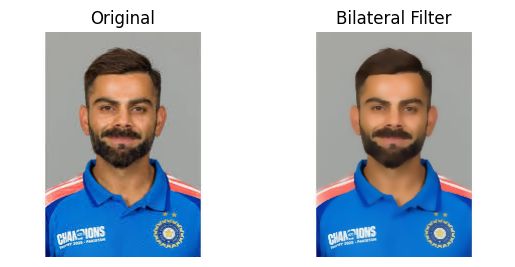

In [49]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(bilateral)
plt.title("Bilateral Filter")
plt.axis('off')

plt.show()

<hr>

## 9. Write a program to plot histograms of an image before and after Gaussian smoothing (kernel = 5×5). Comment in one line: “How does smoothing change the histogram shape?

<hr>

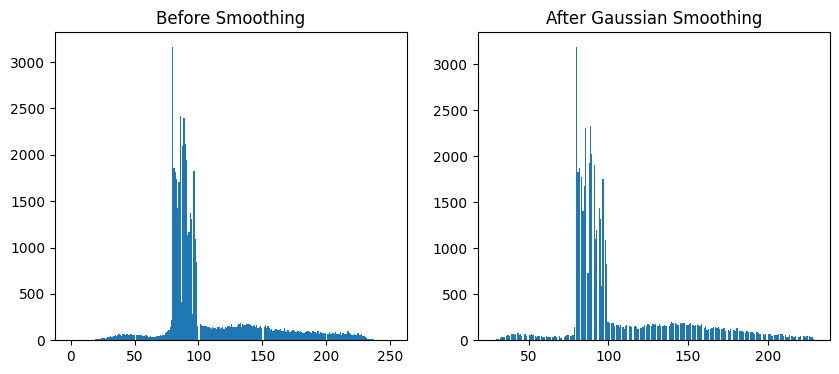

Conclusion: Smoothing makes histogram narrower & reduces high-frequency variations.


In [50]:
img = cv2.imread("sunflower.jpg", 0)
blur = cv2.GaussianBlur(img, (5,5), 0)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(img.flatten(), 256)
plt.title("Before Smoothing")

plt.subplot(1,2,2)
plt.hist(blur.flatten(), 256)
plt.title("After Gaussian Smoothing")

plt.show()

print("Conclusion: Smoothing makes histogram narrower & reduces high-frequency variations.")


<hr>

## 10. WAP that compares the MSE of: a noisy image, a Gaussian-blurred version of the noisy image. Which has lower MSE? Print the conclusion.

<hr>

In [53]:
img = cv2.imread("sunflower.jpg")

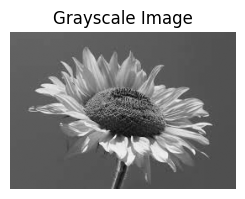

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')

plt.title("Grayscale Image")

plt.axis('off')

plt.show()

In [57]:
noise = np.random.normal(0, 20, gray.shape).astype(np.int16)
noisy = np.clip(gray.astype(np.int16) + noise, 0, 255).astype(np.uint8)


blurred = cv2.GaussianBlur(noisy, (5,5), 0)

mse_noisy = mse(gray.flatten(), noisy.flatten())
mse_blurred = mse(gray.flatten(), blurred.flatten())

print("MSE (Original vs Noisy):   ", mse_noisy)
print("MSE (Original vs Blurred): ", mse_blurred)

if mse_blurred < mse_noisy:
    print("Conclusion: Blurred image has LOWER MSE -> noise reduced.")
else:
    print("Blurred image has HIGHER MSE.")


MSE (Original vs Noisy):    383.6816492058128
MSE (Original vs Blurred):  133.8758523348508
Conclusion: Blurred image has LOWER MSE -> noise reduced.


<hr>

# <center> The End  </center>

<hr>